# Celular Automata

Let's try playing with cellular automata and other techniques used in artificial life today in the exercises.

Cellular automata are (typically) 1D or 2D grids, where each box can have one of $k$ colors. In the simplest case, there are only two colors. Then it is often said that there is an organism on some squares and the others are empty. Based on the color of the box and its neighbors up to a given distance, the rules for changing the colors of the boxes are then defined.

The goals of cellular automata research can be different - from the study of cellular automata as such, to the search for rules that enable modeling of real systems (e.g. the spread of fire, or the movement of cars on the road).

111 -> 0
110 -> 1
101 -> 1
100 -> 0
011 -> 0
010 -> 0
001 -> 1
000 -> 1


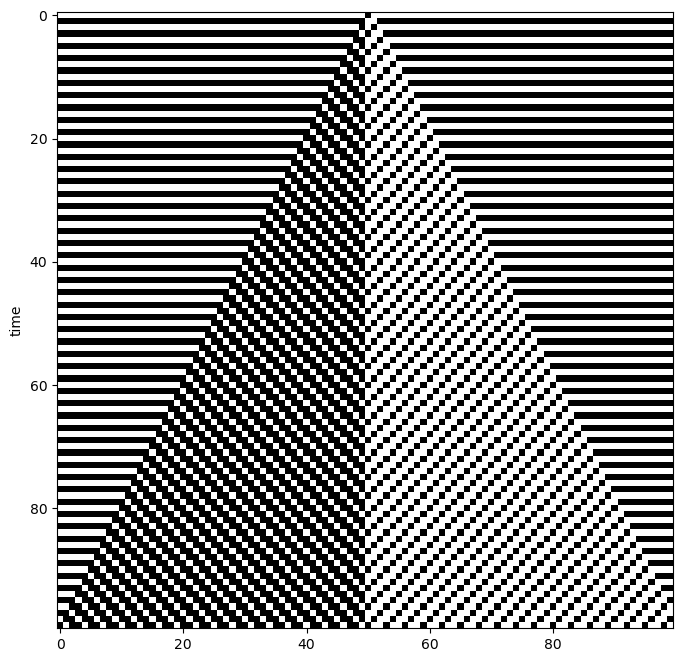

In [1]:
import matplotlib.pyplot as plt
import cellpylib as cpl

ca = cpl.init_simple(100)

rule_num = 0b01100011 #99

ca = cpl.evolve(ca, timesteps=100, apply_rule=lambda n, c, s: cpl.nks_rule(n, rule_num))

#vypiseme si, co nase pravidlo dela, jako tabulku
bin_rn = bin(rule_num)[2:]
bin_rn = '0'*(8-len(bin_rn)) + bin_rn
for i, c in enumerate(bin_rn):
    s = bin(7-i)[2:]
    s = '0'*(3-len(s)) + s
    print(s, '->', c)

# cpl.plot pouziva matplotlib, muzeme tedy snadno specifikovat velikost obrazku
plt.figure(figsize=(12,8))
cpl.plot(ca)

## Exercise

Try playing around with the rule settings to find an automaton that generates interesting shapes (checkerboard, straight lines, Sierpinski triangle, etc.).

Could you find a rule that will make the entire row black if there are more black squares on the first line and white in the opposite case? Could you use an evolutionary algorithm to do this?

# Convay's Game of Life

Game of Life is one of the most famous 2D cellular automata. In 2D automata, the new value of each square depends on all surrounding squares. In the case of Game of Life, the rules are simple:
  1. a living cell with less than two or more than three living neighbors dies
  2. a living cell with two or three living neighbors survives
  3. a dead cell with exactly three living neighbors comes to life
 
Based on these very simple rules, quite interesting organisms can be implemented that multiply, move, etc.

In Python, we can try the Game of Life thanks to the seagull library (according to the abbreviation of the game name - CGoL).

2023-05-04 00:24:09.333 | INFO     | seagull.simulator:compute_statistics:128 - Computing simulation statistics...
2023-05-04 00:24:09.365 | INFO     | seagull.simulator:animate:183 - Rendering animation...


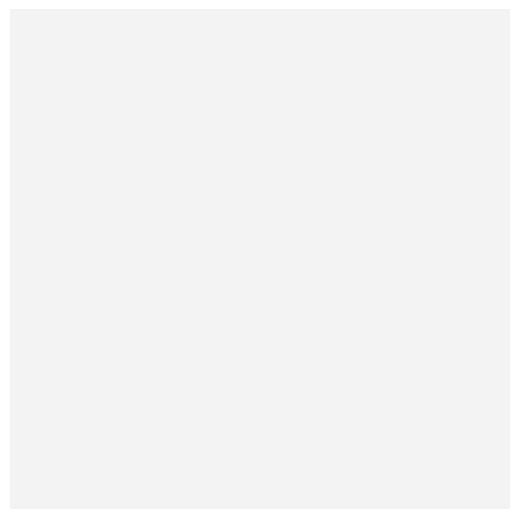

In [2]:
plt.rcParams["animation.html"] = "jshtml"

import seagull as sg
import seagull.lifeforms as lf

# Initialize board
board = sg.Board(size=(40,40))

# Add three Pulsar lifeforms in various locations
board.add(lf.Pulsar(), loc=(1,1))
board.add(lf.Pulsar(), loc=(1,22))
board.add(lf.Pulsar(), loc=(20,1))
board.add(lf.Pulsar(), loc=(20,22))

# Simulate board
sim = sg.Simulator(board)
sim.run(sg.rules.conway_classic, iters=100)

anim = sim.animate()

In [3]:
anim

## Exercise

Try your own organisms in Game of Life, can you find some that behave interestingly? (you can define your own organism with lf.Custom, you enter a 2D array of 0 and 1 as a parameter).

# Langton's Ant

Langton's ant is another very simple simulation of life. It is an ant that moves on a grid with two colors. With each move, it recolors its square to the opposite color. Depending on the initial color of the box, it is then decided whether to go left or right.

We will show the ant implementation in the [NetLogo](http://ccl.northwestern.edu/netlogo/index.shtml) environment, which is often used for similar simulations. We will follow the [tutorial](https://www.cs.unm.edu/~joel/cs4all/langtons-ant.pdf).